## Embedding Clustering

En este notebook hay código para poder poder plotear embeddings de datos de texto e imágenes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.manifold import TSNE

### Importamos el dataset consolidado

In [3]:
dataset_df = pd.read_excel('../../data/dataset_v3.xlsx')
dataset_df.head()

,Unnamed: 0,catalogation_id,cronology,cronology_time,culture_cl,morfofunctional_category,description,principal_scene,decoration_tecnique_external_body_section1,color_external_body_section1,...,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105,file_path,image_path
0,0,ML020107,Horizonte Medio,7,Sican,botella doble cuerpo asa puente cintada silbadora,botella doble cuerpo asa puente cintada silbad...,NaN,pintado escultorico,crema y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020107a.jpg
1,1,ML020108,Horizonte Medio,7,Sican,botella doble pico asa puente cintada escultorica,botella doble pico asa puente cintada escultor...,NaN,pintado escultorico,rojo y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020108a.jpg
2,2,ML020109,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020109a.jpg
3,3,ML020110,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020110a.jpg
4,4,ML020111,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y marron,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020111a.jpg


### Importamos los embeddings

In [41]:
dataset_filename = 'bert_embeddings.csv'
sep_char = ';'

In [42]:
df = pd.read_csv(f'../../data/{dataset_filename}', sep=sep_char)
df

,Unnamed: 0,catalogation_id,culture_cl,description,embedding
0,0,ML020107,Sican,botella doble cuerpo asa puente cintada silbad...,"[0.17316726, -0.6274872, 0.0407279, -0.0887306..."
1,1,ML020108,Sican,botella doble pico asa puente cintada escultor...,"[0.17790586, -0.68238825, -0.40351287, -0.2387..."
2,2,ML020109,Sican,botella gollete asa puente cintada protoma sil...,"[0.07478304, -0.5415242, -0.34691423, 0.007677..."
3,3,ML020110,Sican,botella gollete asa puente cintada protoma sil...,"[-0.06786743, -0.45162752, -0.20201102, -0.069..."
4,4,ML020111,Sican,botella gollete asa puente cintada protoma sil...,"[0.095533825, -0.518077, -0.30639765, -0.22455..."
...,...,...,...,...,...
33576,33577,ML038832,Tiahuanaco,plato con diseños geometricos de lineas horizo...,"[-0.21575417, -0.6014442, -0.5351323, 0.295663..."
33577,33578,ML038833,Tiahuanaco,plato con diseños geometricos de eses ( s) y l...,"[-0.59130156, -1.0794916, -0.2997423, -0.03917..."
33578,33579,ML015075,Cajamarca,cuenco escultorico que representa a un felino ...,"[0.10485042, -0.74276745, -0.27508265, -0.3266..."
33579,33580,ML015241,Cajamarca,cuenco con representacion de cabeza estilizada...,"[0.7909232, -0.19150409, -0.6404954, -0.548680..."


Agregamos la columna de cronología en caso no exista

In [43]:
if 'cronology_time' not in df.columns.tolist():
    df['cronology_time'] = dataset_df['cronology_time']

Agregamos las columnas de traits al dataset

In [44]:
trait_columns = [col for col in dataset_df.columns.tolist() if 'trait_' in col]
for t in trait_columns:
    df[t] = dataset_df[t]
df.head()

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_47817/3621872797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t] = dataset_df[t]
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_47817/3621872797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t] = dataset_df[t]
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_47817/3621872797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

,Unnamed: 0,catalogation_id,culture_cl,description,embedding,cronology_time,trait_color_amarillo,trait_color_beige,trait_color_blanco,trait_color_crema,...,trait_n87,trait_n88,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105
0,0,ML020107,Sican,botella doble cuerpo asa puente cintada silbad...,"[0.17316726, -0.6274872, 0.0407279, -0.0887306...",7,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
1,1,ML020108,Sican,botella doble pico asa puente cintada escultor...,"[0.17790586, -0.68238825, -0.40351287, -0.2387...",7,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,2,ML020109,Sican,botella gollete asa puente cintada protoma sil...,"[0.07478304, -0.5415242, -0.34691423, 0.007677...",7,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
3,3,ML020110,Sican,botella gollete asa puente cintada protoma sil...,"[-0.06786743, -0.45162752, -0.20201102, -0.069...",7,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
4,4,ML020111,Sican,botella gollete asa puente cintada protoma sil...,"[0.095533825, -0.518077, -0.30639765, -0.22455...",7,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0


In [45]:
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
display(df.head())
len(df)

,catalogation_id,culture_cl,description,embedding,cronology_time,trait_color_amarillo,trait_color_beige,trait_color_blanco,trait_color_crema,trait_color_gris,...,trait_n87,trait_n88,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105
0,ML020107,Sican,botella doble cuerpo asa puente cintada silbad...,"[0.17316726, -0.6274872, 0.0407279, -0.0887306...",7,0,0,0,1,0,...,0,0,0,0,1,1,1,0,1,0
1,ML020108,Sican,botella doble pico asa puente cintada escultor...,"[0.17790586, -0.68238825, -0.40351287, -0.2387...",7,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,ML020109,Sican,botella gollete asa puente cintada protoma sil...,"[0.07478304, -0.5415242, -0.34691423, 0.007677...",7,0,0,0,1,0,...,0,0,0,0,1,1,1,0,1,0
3,ML020110,Sican,botella gollete asa puente cintada protoma sil...,"[-0.06786743, -0.45162752, -0.20201102, -0.069...",7,0,0,0,1,0,...,0,0,0,0,1,1,1,0,1,0
4,ML020111,Sican,botella gollete asa puente cintada protoma sil...,"[0.095533825, -0.518077, -0.30639765, -0.22455...",7,0,0,0,1,0,...,0,0,0,0,1,1,1,0,1,0


33581

### Limpiamos el dataset de embeddings

In [46]:
'''
Reglas de descarte
    - drop if culture_cl=="Chanca"
    -  drop if culture_cl=="Lima"
    -  drop if culture_cl=="Cajamarca" & period_n==5
    -  drop if culture_cl=="Cajamarca" & period_n==7
    -  drop if culture_cl=="Pukara" & period_n==6
    -  drop if culture_cl=="Salinar" & period_n==6
    -  drop if culture_cl=="Sican" & period_n==8
    - drop if culture_cl=="Vicus" & period_n==6
'''
df = df[df.culture_cl != 'Chanca']
df = df[df.culture_cl != 'Lima']
df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 5))]
df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 7))]
df = df[~((df.culture_cl == 'Pukara') & (df.cronology_time == 6))]
df = df[~((df.culture_cl == 'Salinar') & (df.cronology_time == 6))]
df = df[~((df.culture_cl == 'Sican') & (df.cronology_time == 8))]
df = df[~((df.culture_cl == 'Vicus') & (df.cronology_time == 6))]
len(df)

33562

### Gráfico de embeddings

In [47]:
embedding_column = 'embedding'

#### Preparamos el dataset

In [48]:
def str_to_list(string):
    string_list = string.strip('][').split(', ')
    float_list = [float(i) for i in string_list]
    return float_list

df[embedding_column] = df[embedding_column].apply(str_to_list)

In [49]:
df_spread = df[[embedding_column]].apply(lambda x: pd.Series(x[embedding_column]), axis=1).rename(columns=lambda i: f"c{i+1}")

In [50]:
df_spread.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c759,c760,c761,c762,c763,c764,c765,c766,c767,c768
0,0.173167,-0.627487,0.040728,-0.088731,0.617066,-0.337456,0.135651,-0.149837,0.491086,-0.723882,...,-0.774106,0.853167,-0.180907,0.028703,-0.369451,-0.308601,-0.164613,-0.693629,0.288601,-0.422965
1,0.177906,-0.682388,-0.403513,-0.238792,0.611270,0.088557,0.092499,-0.005162,0.373875,-0.571493,...,-0.776706,0.824802,0.035774,-0.093099,0.047395,-0.317546,-0.275383,-0.753768,0.268720,-0.551048
2,0.074783,-0.541524,-0.346914,0.007678,0.696107,-0.103183,0.187311,0.024575,0.453283,-0.905675,...,-0.408549,0.404263,-0.341050,-0.006181,-0.477399,-0.235129,-0.620021,-0.519903,0.018254,-0.329690
3,-0.067867,-0.451628,-0.202011,-0.069973,0.792615,-0.012866,0.419816,0.109632,0.400058,-0.870561,...,-0.316784,0.737670,-0.390274,0.306665,-0.625972,-0.171087,-0.469137,-0.575207,0.204847,-0.062260
4,0.095534,-0.518077,-0.306398,-0.224559,0.642200,0.039839,0.189774,-0.140158,0.500054,-0.721642,...,-0.602362,0.555453,-0.319298,-0.138743,-0.525403,-0.102353,-0.365751,-0.685777,0.198765,-0.294869


#### Seteamos los parámetros del gráfico

In [51]:
def get_tsne_df(n_components, perplexity, learning_rate, n_iter):
    tsne = TSNE(n_components=n_components, 
            perplexity=perplexity,
            learning_rate=learning_rate,
            n_iter=n_iter,
            verbose=1, 
            init="random")

    df_spread_tsne = tsne.fit_transform(df_spread)
    df_spread_tsne = pd.DataFrame(df_spread_tsne)
    df_spread_tsne = df_spread_tsne.rename(columns={0: 'dim1', 1: 'dim2', 2: 'dim3'})
    return df_spread_tsne


In [52]:
def sample_df(original_df, n_samples):
    cultures = original_df.culture_cl.unique().tolist()
    sampled_dfs = list()

    for c in cultures:
        culture_df = original_df[original_df.culture_cl == c]
        if n_samples > len(culture_df):
            sampled_dfs.append(culture_df)
        else:
            sampled_df = culture_df.sample(n=n_samples, random_state=100)
            sampled_dfs.append(sampled_df)
    
    df = pd.concat(sampled_dfs, axis=0)
    return df


def plot_embeddings_2d(original_df, tsne_df, model_name, get_samples=False, n_samples=100, filter_by_trait: str=None):
    if filter_by_trait is not None:
        tsne_df[filter_by_trait] = original_df[filter_by_trait]
        tsne_df = tsne_df[tsne_df[filter_by_trait] > 0]

    if get_samples:
        tsne_df = sample_df(tsne_df, n_samples)

    sns.set(rc={"figure.figsize":(12, 10)})

    ax = sns.scatterplot(tsne_df, x='dim1', y='dim2', hue='culture_cl')

    # configurar el gráfico    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(f'Dos dimensiones t-SNE de distintas descripciones de imágenes según cultura | {model_name}')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.show()



def plot_embeddings_3d(original_df, tsne_df, model_name, get_samples=False, n_samples=100, filter_by_trait: str=None):
    if filter_by_trait is not None:
        tsne_df[filter_by_trait] = original_df[filter_by_trait]
        tsne_df = tsne_df[tsne_df[filter_by_trait] > 0]

    if get_samples:
        tsne_df = sample_df(tsne_df, n_samples)
    
    sns.set(rc={"figure.figsize":(12, 10)})

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    color_mapping = {
        'Sican': 'red',
        'Recuay': 'blue',
        'Vicus': 'green',
        'Lima': 'yellow',
        'Gallinazo': 'magenta',
        'Moche': 'brown',
        'Salinar': 'black',
        'Paracas': 'white',
        'Wari': 'lightblue',
        'Cajamarca': 'lightgreen',
        'Cupisnique': 'lightyellow',
        'Pukara': 'gray',
        'Nasca': 'pink',
        'Chimu': 'purple',
        'Chanca': 'cyan',
        'Chancay': 'orange',
        'Inca': 'olive',
        'Tiahuanaco': 'gold',
        'Chincha': 'darkred'
    }

    patches = list() # For custom legend
    for culture, color in color_mapping.items():
        culture_df = tsne_df[tsne_df.culture_cl == culture]
        x = culture_df['dim1']
        y = culture_df['dim2']
        z = culture_df['dim3']

        ax.scatter(x, y, z, c=color, marker='o')

        # Set legends
        patch = mpatches.Patch(color=color, label=culture)
        patches.append(patch)


    ax.set_xlabel("Dimensión 1")
    ax.set_ylabel("Dimensión 2")
    ax.set_zlabel("Dimensión 3")
    ax.legend(handles=patches)
    
    plt.title(f'Tres dimensiones t-SNE de distintas descripciones de imágenes según cultura | {model_name}')
    plt.show()

In [53]:
perplexity = 250
learning_rate = 'auto'
n_iter = 300
trait = 'trait_n15'

In [16]:
df_tsne_2d = get_tsne_df(2, perplexity, learning_rate, n_iter)
df_tsne_3d = get_tsne_df(3, perplexity, learning_rate, n_iter)

[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 33561 samples in 0.097s...
[t-SNE] Computed neighbors for 33561 samples in 12.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33561
[t-SNE] Computed conditional probabilities for sample 2000 / 33561
[t-SNE] Computed conditional probabilities for sample 3000 / 33561
[t-SNE] Computed conditional probabilities for sample 4000 / 33561
[t-SNE] Computed conditional probabilities for sample 5000 / 33561
[t-SNE] Computed conditional probabilities for sample 6000 / 33561
[t-SNE] Computed conditional probabilities for sample 7000 / 33561
[t-SNE] Computed conditional probabilities for sample 8000 / 33561
[t-SNE] Computed conditional probabilities for sample 9000 / 33561
[t-SNE] Computed conditional probabilities for sample 10000 / 33561
[t-SNE] Computed conditional probabilities for sample 11000 / 33561
[t-SNE] Computed conditional probabilities for sample 12000 / 33561
[t-SNE] Computed conditional probabilities for s

In [17]:
df_tsne_2d['catalogation_id'] = df['catalogation_id']
df_tsne_2d['culture_cl'] = df['culture_cl']
df_tsne_2d['cronology_time'] = df['cronology_time']
df_tsne_3d['catalogation_id'] = df['catalogation_id']
df_tsne_3d['culture_cl'] = df['culture_cl']
df_tsne_3d['cronology_time'] = df['cronology_time']

### Using umap

In [54]:
import umap

In [106]:
# Read the source code: https://github.com/lmcinnes/umap/blob/master/umap/umap_.py
reducer = umap.UMAP(n_components=2, 
                    n_neighbors=30,
                    learning_rate=0.01,
                    init='pca',
                    random_state=31)

In [107]:
df_umap = reducer.fit_transform(X=df_spread.values)

/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [108]:
df_umap = pd.DataFrame(df_umap, columns=['dim1', 'dim2'])
df_umap['catalogation_id'] = df['catalogation_id']
df_umap['culture_cl'] = df['culture_cl']
df_umap['cronology_time'] = df['cronology_time']
df_umap.head()

,dim1,dim2,catalogation_id,culture_cl,cronology_time
0,-1.267978,6.156463,ML020107,Sican,7.0
1,-1.425866,5.369067,ML020108,Sican,7.0
2,-1.248699,6.763638,ML020109,Sican,7.0
3,-1.272687,6.739635,ML020110,Sican,7.0
4,-1.252058,6.721777,ML020111,Sican,7.0


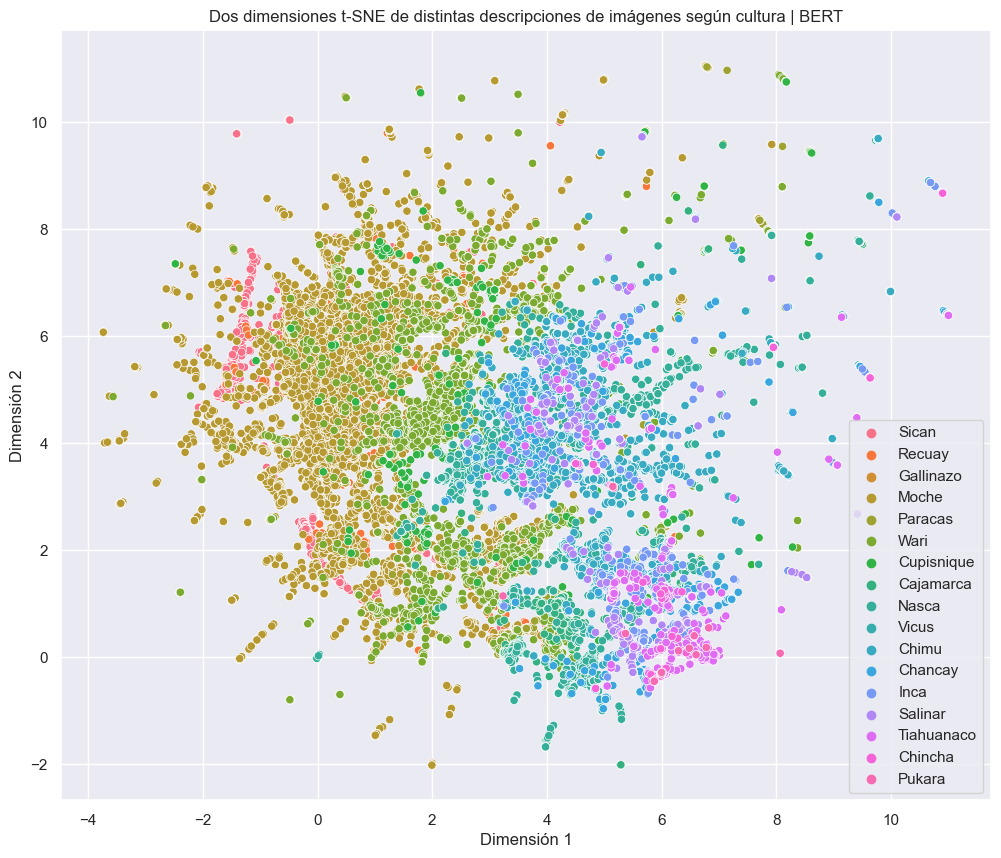

In [109]:
plot_embeddings_2d(df, df_umap, 'BERT')

Realizamos los plot por cronology time y filtro de trait

In [110]:
df_umap[trait] = df[trait]
df_umap = df_umap[~df_umap.cronology_time.isnull()]

In [111]:
def plot_by_cronology_time(df, title, trait=None, n_samples=None):

    df_notnull = df[~df.cronology_time.isnull()]
    df_notnull = df[df.cronology_time != 9]

    if n_samples is not None:
        df_notnull = sample_df(df_notnull, n_samples)

    if trait is not None:
        grid = sns.FacetGrid(df_notnull, col='cronology_time', row=trait, height=5)
    else:
        grid = sns.FacetGrid(df_notnull, col='cronology_time', col_wrap=3, height=5)
    g = grid.map_dataframe(sns.scatterplot, "dim1", "dim2", hue='culture_cl')
    g.add_legend()

    g.figure.subplots_adjust(top=0.9)
    g.figure.suptitle(title)

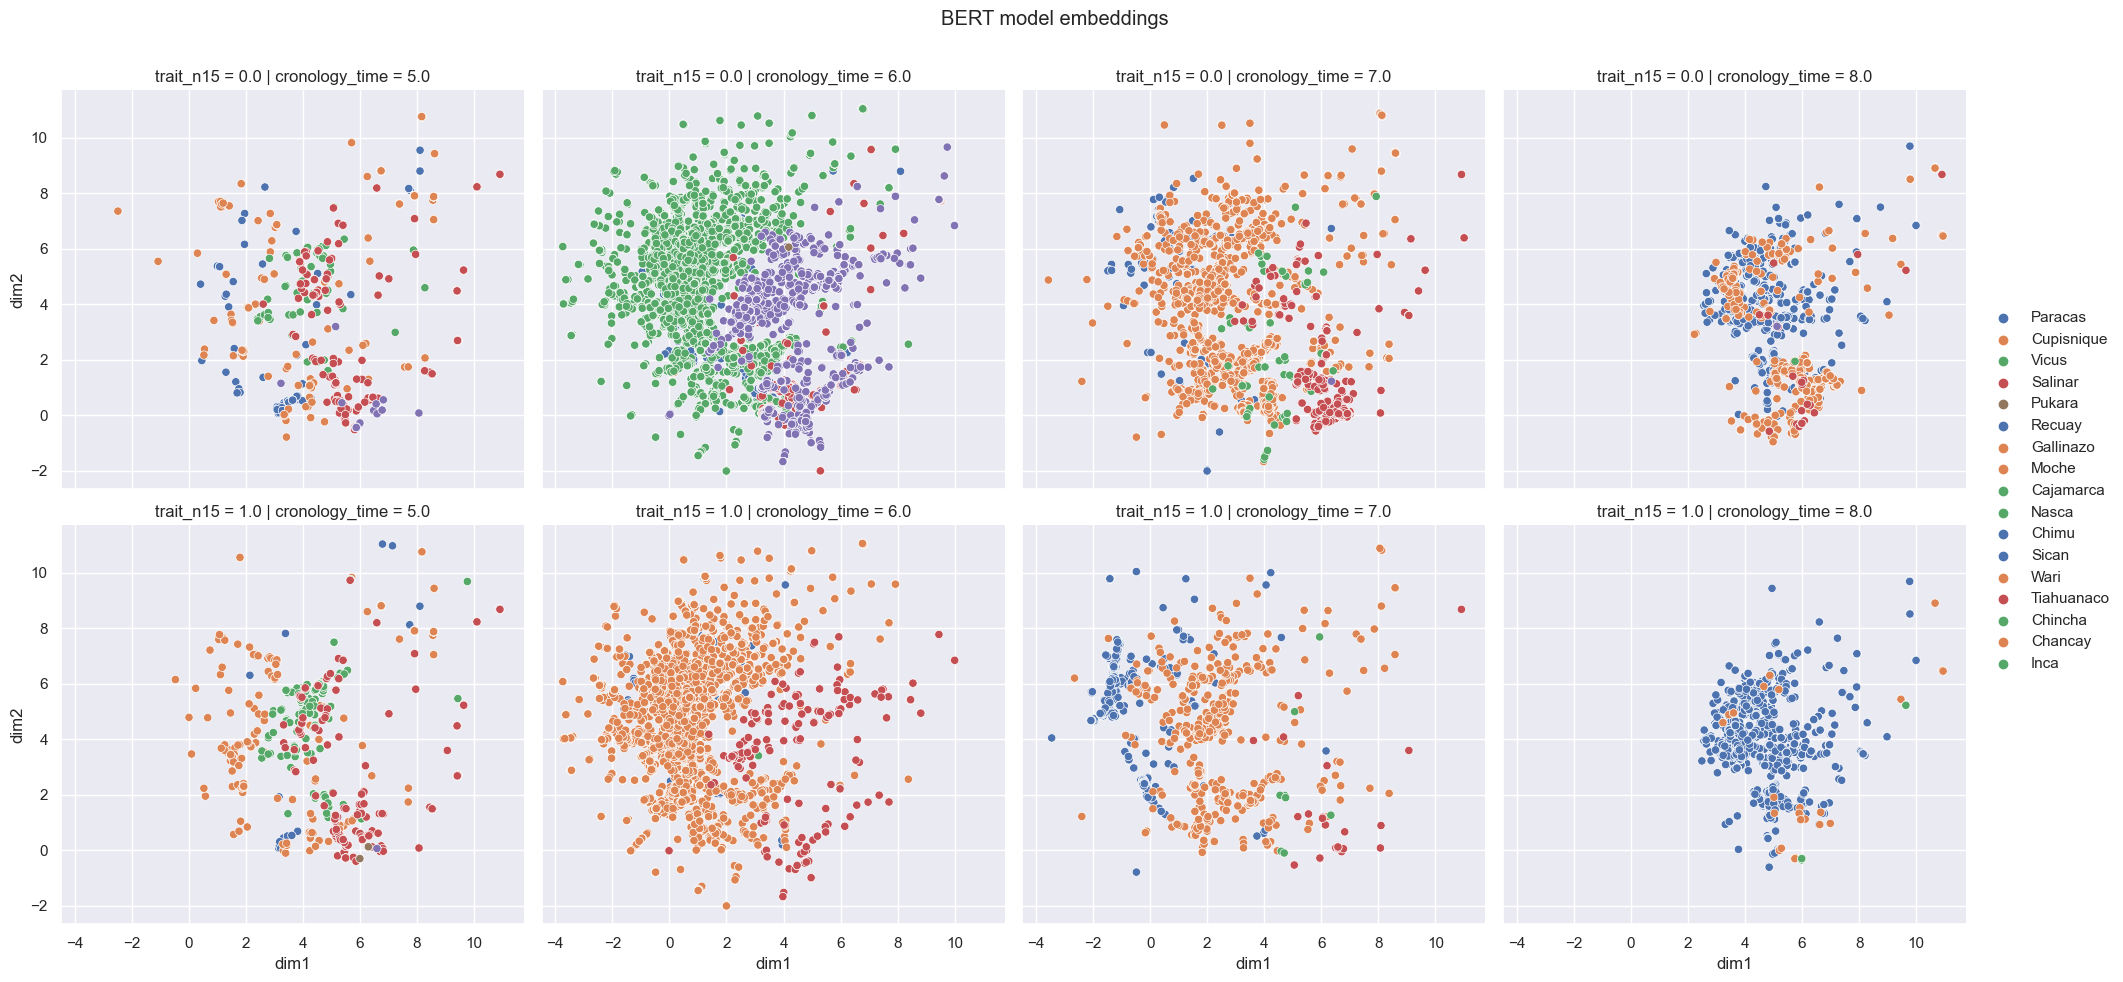

In [112]:
plot_by_cronology_time(df_umap, 'BERT model embeddings', trait=trait)

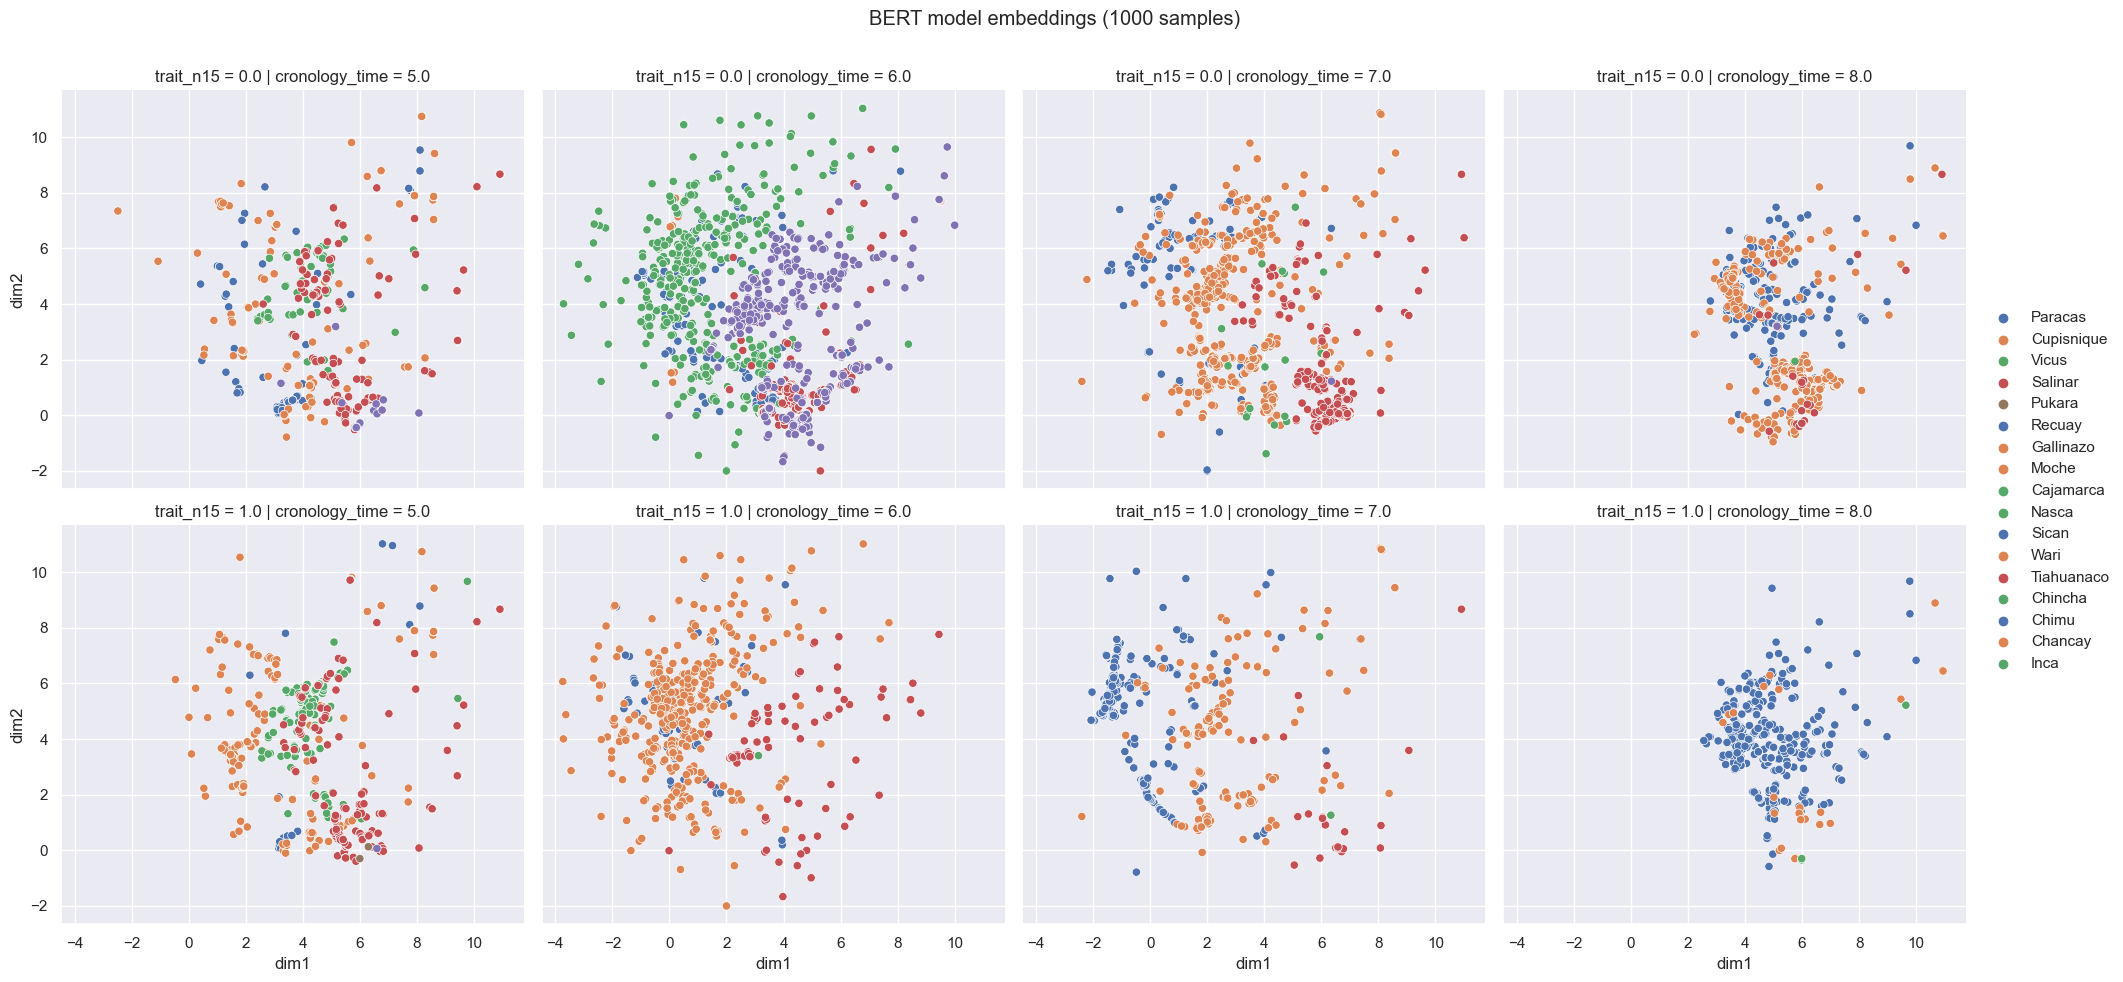

In [113]:
plot_by_cronology_time(df_umap, 'BERT model embeddings (1000 samples)', trait=trait, n_samples=1000)